In [7]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

s3= boto3.resource('s3')
bucket_name= 'macklins-bucket'
bucket= s3.Bucket(bucket_name)

file_key= 'Real_Estate.csv'

bucket_object= bucket.Object(file_key)
file_object= bucket_object.get()
file_content_stream= file_object.get('Body')

## Reading the data file
house_price= pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
## Dropping the No and transaction_date column
house_price= house_price.drop(columns= ['No', 'transaction_date'], axis= 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
from sklearn.model_selection import train_test_split

## Defining the variables
X= house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
Y= house_price['house_price_of_unit_area']


## Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
from sklearn.linear_model import LinearRegression

## Building the linear model
lm_md = LinearRegression().fit(X_train, Y_train)

In [14]:
## Using the model to predict on test
lm_preds = lm_md.predict(X_test)
lm_preds

array([33.37522315, 30.36014517, 42.82666472, 35.91212865, 33.19904893,
       28.60088502, 45.5132681 , 44.84657221, 42.72594382, 39.73611472,
       49.69628867, 41.55834813, 24.47972377, 15.89282577, 44.2041673 ,
       42.82269829, 44.99152934, 30.49567918, 50.33967253, 42.77757842,
       45.18446723, 10.29519779, 39.35749645, 34.86717251, 45.96906706,
       15.86397018, 39.32106887, 42.05522476, 36.50635852, 46.8129342 ,
       39.57038775, 33.76729619, 43.32687313, 12.18327023, 41.38078532,
       37.26483026, 39.70094617, 28.14688714, 47.68640498, 47.80633154,
       47.30142946, 38.58129594, 45.71482858, 50.33967253, 15.05601363,
       33.34636756, 31.23710279, 45.64482206, 37.91914803, 33.373334  ,
       51.43034977, 25.30689527, 39.10582684, 41.6449149 , 34.62031393,
       44.58369701, 34.83831692, 31.38138074, 31.26595838, 45.8139518 ,
       39.99550061, 45.71482858, 12.21203441, 30.51166077, 43.83312571,
       43.09063302, 43.83925544, 44.39918575, 42.44907237, 41.73

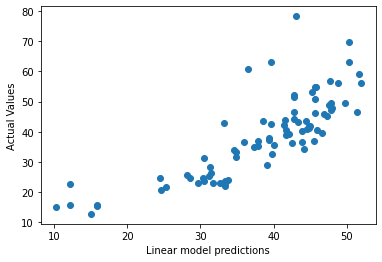

In [17]:
import matplotlib.pyplot as plt 

plt.scatter(x = lm_preds, y= Y_test)
plt.xlabel('Linear model predictions')
plt.ylabel('Actual Values')
plt.show()

In [19]:
## Computing the mse
np.mean((Y_test - lm_preds)**2)

64.54091967774373